## Задание 1.
    1. Скачать данные по ссылке,
    https://drive.google.com/file/d/1MpAdHAl727fO3oW32NO4FpSRhUBUfjfS,
    2. Считать данные с помощью pandas,
    3. Вывести на экран первые 5 строк

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./laptops_10.csv')

In [3]:
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


### 1.1 Изучите количество памяти с помощью matplotlib

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sbs

In [6]:
df.Memory_Amount.value_counts()

256     508
1024    250
128     177
512     140
500     132
32       45
64       17
2048     16
16       10
180       5
240       1
8         1
508       1
Name: Memory_Amount, dtype: int64

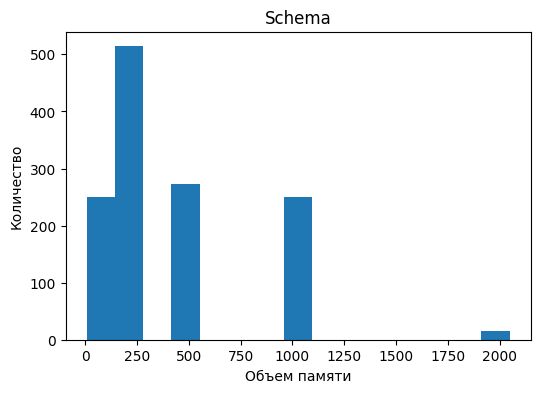

In [7]:
plt.figure(figsize=(6,4))
plt.hist(df.Memory_Amount, bins = 15)
plt.title('Schema')
plt.xlabel('Объем памяти')
plt.ylabel('Количество');

### 1.2 Изучите стоимость ноутбуков с помощью matplotlib

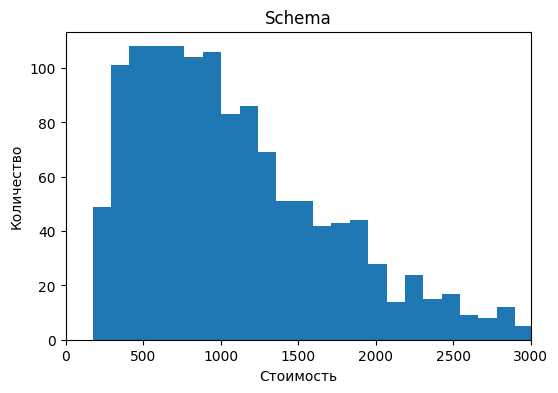

In [8]:
plt.figure(figsize=(6,4))
plt.xlim(0,3000)
plt.hist(df.Price_euros, bins = 50)
plt.title('Schema')
plt.xlabel('Стоимость')
plt.ylabel('Количество');

### 1.3 Изучите вес ноутбуков с помощью matplotlib

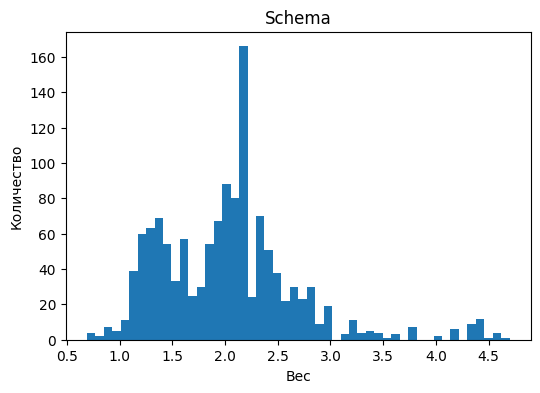

In [9]:
plt.figure(figsize=(6,4))
plt.hist(df.Weight, bins = 50)
plt.title('Schema')
plt.xlabel('Вес')
plt.ylabel('Количество');

## Задание 2.,
    ### 2.1 Изучите распределение типов носителя

In [10]:
df.Memory_Type.unique()

array(['SSD', 'FlashStorage', 'HDD', 'Hybrid'], dtype=object)

In [11]:
all_types = df.Memory_Type.value_counts()

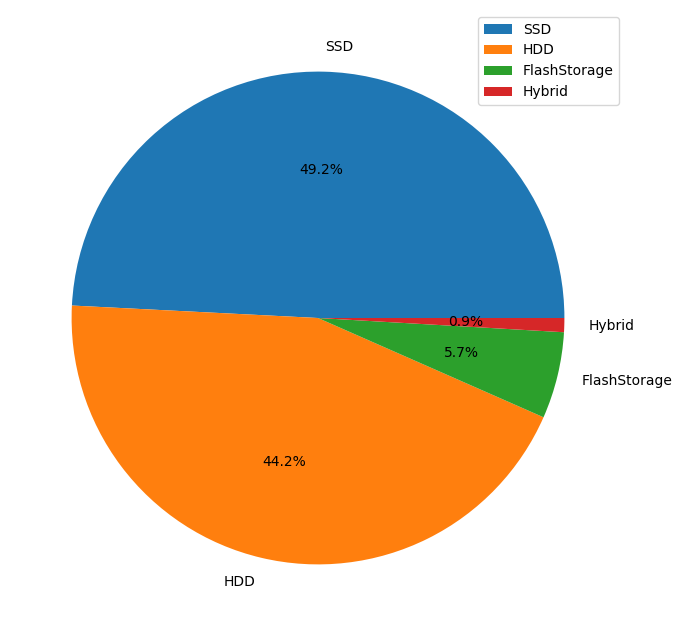

In [12]:
plt.figure(figsize=(10,8))
plt.pie(all_types.values, autopct='%1.1f%%', labels=all_types.index)
plt.legend(all_types.index);

### 2.2 Изучите распределение компаний производителей

In [13]:
df.sample()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
1285,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16GB,Intel HD Graphics 520,Windows 10,1.3,1499.0,Intel,512,SSD


In [25]:
data = df.Company.value_counts()
data

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

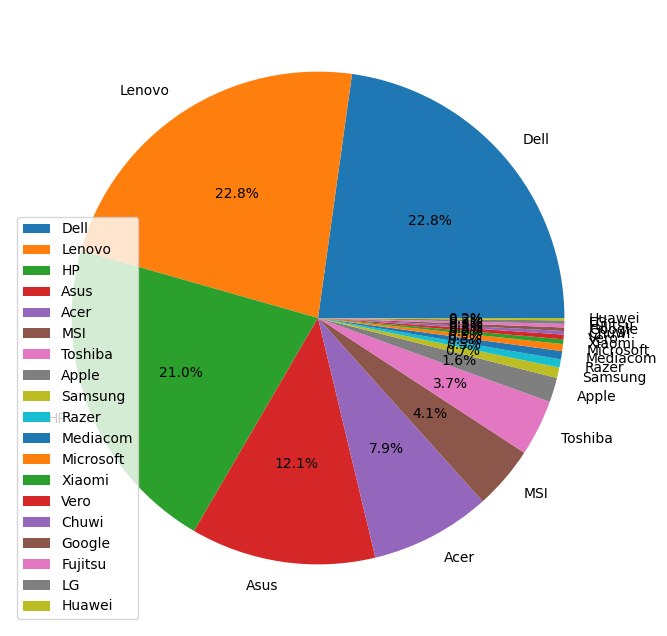

In [15]:
plt.figure(figsize=(10,8))
plt.pie(data, autopct='%1.1f%%', labels= data.index)
plt.legend(data.index);

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Dell'),
  Text(1, 0, 'Lenovo'),
  Text(2, 0, 'HP'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Acer'),
  Text(5, 0, 'MSI'),
  Text(6, 0, 'Toshiba'),
  Text(7, 0, 'Apple'),
  Text(8, 0, 'Samsung'),
  Text(9, 0, 'Razer'),
  Text(10, 0, 'Mediacom'),
  Text(11, 0, 'Microsoft'),
  Text(12, 0, 'Xiaomi'),
  Text(13, 0, 'Vero'),
  Text(14, 0, 'Chuwi'),
  Text(15, 0, 'Google'),
  Text(16, 0, 'Fujitsu'),
  Text(17, 0, 'LG'),
  Text(18, 0, 'Huawei')])

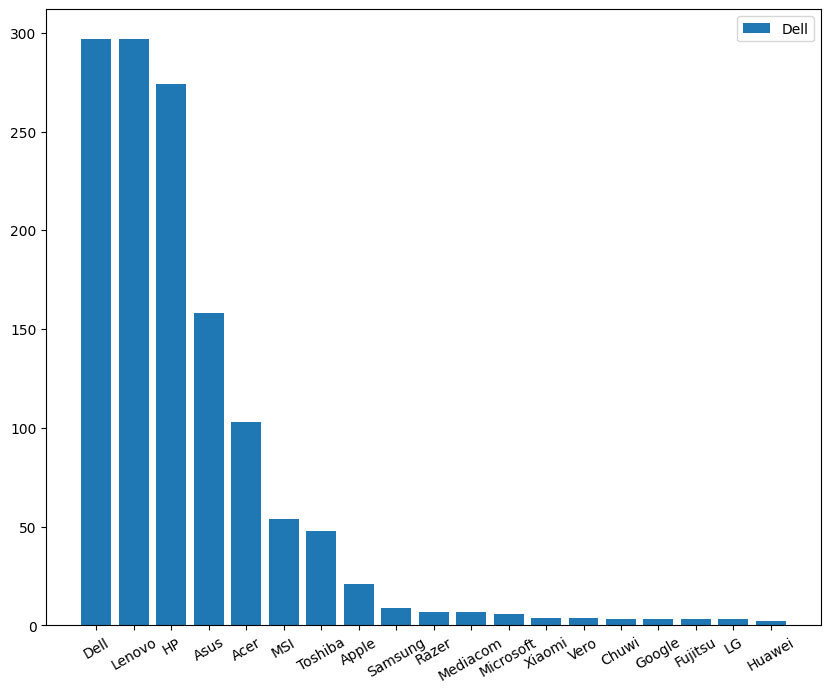

In [16]:
plt.figure(figsize=(10,8))
plt.bar(data.index, data.values)
plt.legend(data.index);
plt.xticks(rotation = 30)

### 2.3 Изучите распределение операционной системы

In [17]:
data = df.OpSys.value_counts()

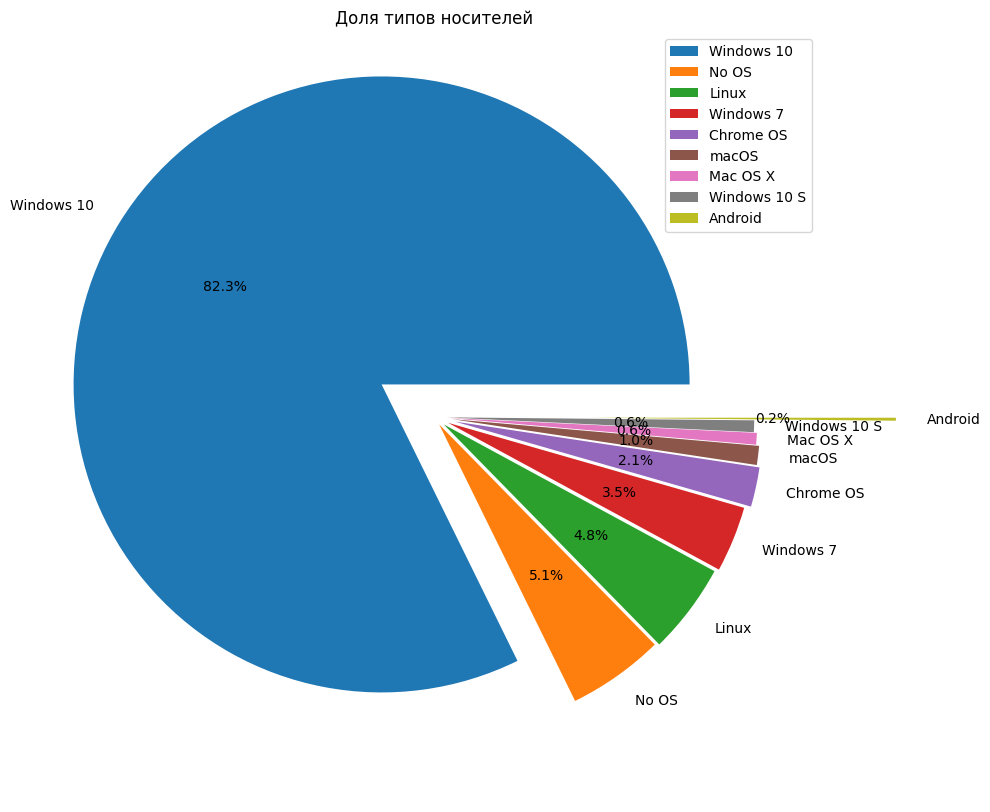

In [18]:
plt.figure(figsize=(10, 10))
expl = [0.2, 0.03, 0.04, 0.05, 0.07, 0.06, 0.05, 0.04, 0.5]
plt.pie(data.values,autopct='%0.1f%%', labels=data.index, explode=expl)
plt.title('Доля типов носителей')
plt.legend(data.index, loc='best');

### 2.4 Изучите распределение компаний производителей CPU

In [19]:
data = df.Cpu_Company.value_counts()

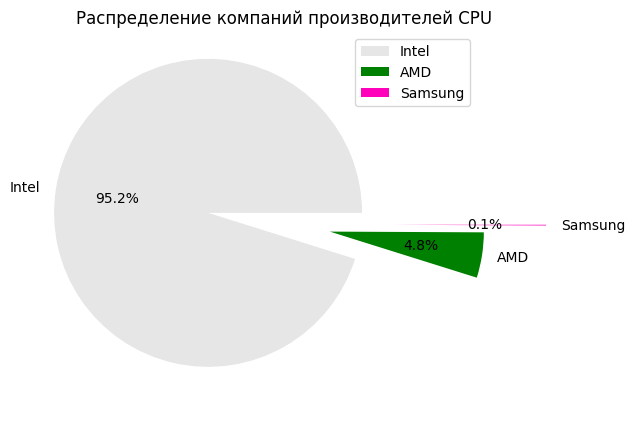

In [20]:
plt.figure(figsize=(5, 5))
explode = [0.5, 0.3, 0.7]
plt.pie(data.values,autopct='%0.1f%%', labels=data.index, explode=explode, colors=['0.9','g','#FF00BB'])
plt.title('Распределение компаний производителей CPU')
plt.legend(data.index, loc='best');

## Задание 3,
    Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму,
    Процессоры от Samsung не изучайте
    ### 3.1 Постройте график в абсолютных величинах
    ### 3.2 Постройте график в относительных величинах
    

In [35]:
data = pd.crosstab(df.Company,df.Cpu_Company)
data

Cpu_Company,AMD,Intel,Samsung
Company,,,
Acer,10,93,0
Apple,0,21,0
Asus,11,147,0
Chuwi,0,3,0
Dell,0,297,0
Fujitsu,0,3,0
Google,0,3,0
HP,25,249,0
Huawei,0,2,0


In [36]:
data.drop(columns=['Samsung'], inplace=True)
data

Cpu_Company,AMD,Intel
Company,,
Acer,10,93
Apple,0,21
Asus,11,147
Chuwi,0,3
Dell,0,297
Fujitsu,0,3
Google,0,3
HP,25,249
Huawei,0,2


In [42]:
data.reset_index(inplace=True)

In [43]:
import numpy as np

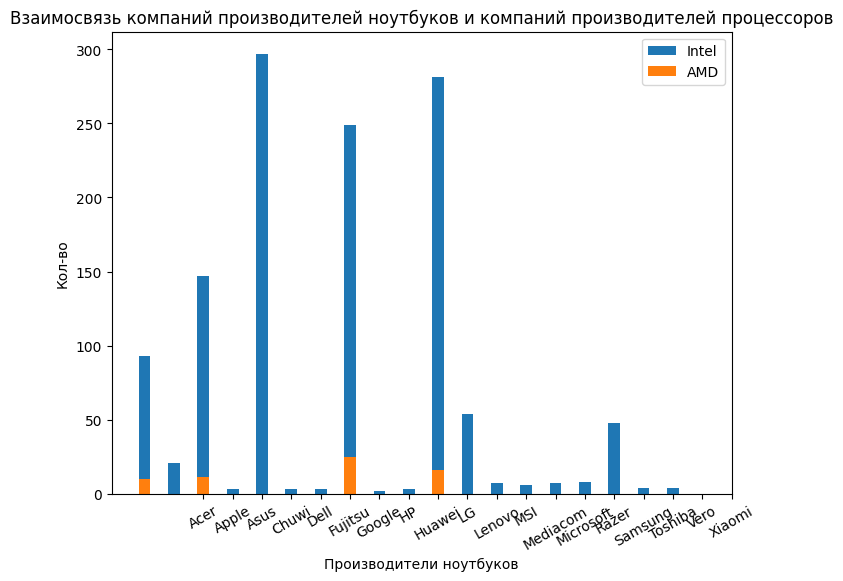

In [44]:
plt.figure(figsize=(8, 6))
n_ticks = np.arange(len(data['Intel']))
offset = 2
w = 0.4
plt.bar(n_ticks - offset, data['Intel'], width=w)
plt.bar(n_ticks - offset, data['AMD'], width=w)
plt.title('Взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров')
plt.xlabel('Производители ноутбуков')
plt.ylabel('Кол-во')
plt.legend(['Intel', 'AMD'])
plt.xticks(n_ticks, data['Company'],rotation = 30);

 ### 3.2 Постройте график в относительных величинах

In [ ]:
data = pd.crosstab(df.Company, df.Cpu_Company, normalize='index')
data.drop(columns=['Samsung'], inplace=True)
data.reset_index(inplace=True)

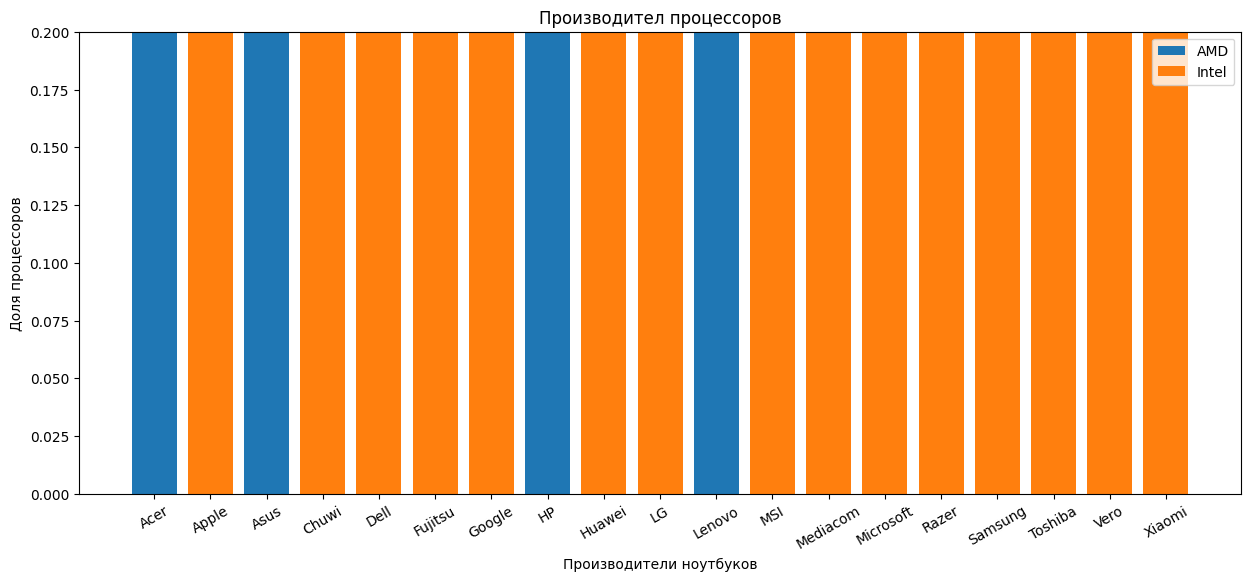

In [47]:
plt.figure(figsize=(15, 6))
plt.bar(data['Company'], data['AMD'],)
plt.bar(data['Company'], data['Intel'], bottom=data.AMD)
plt.title('Производител процессоров')
plt.xlabel('Производители ноутбуков')
plt.ylabel('Доля процессоров')
plt.ylim([0,0.2])
plt.legend(['AMD', 'Intel'])
plt.xticks(rotation = 30);

Задание 4,
### 4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора

Text(0.5, 1.0, 'Ящик с усами')

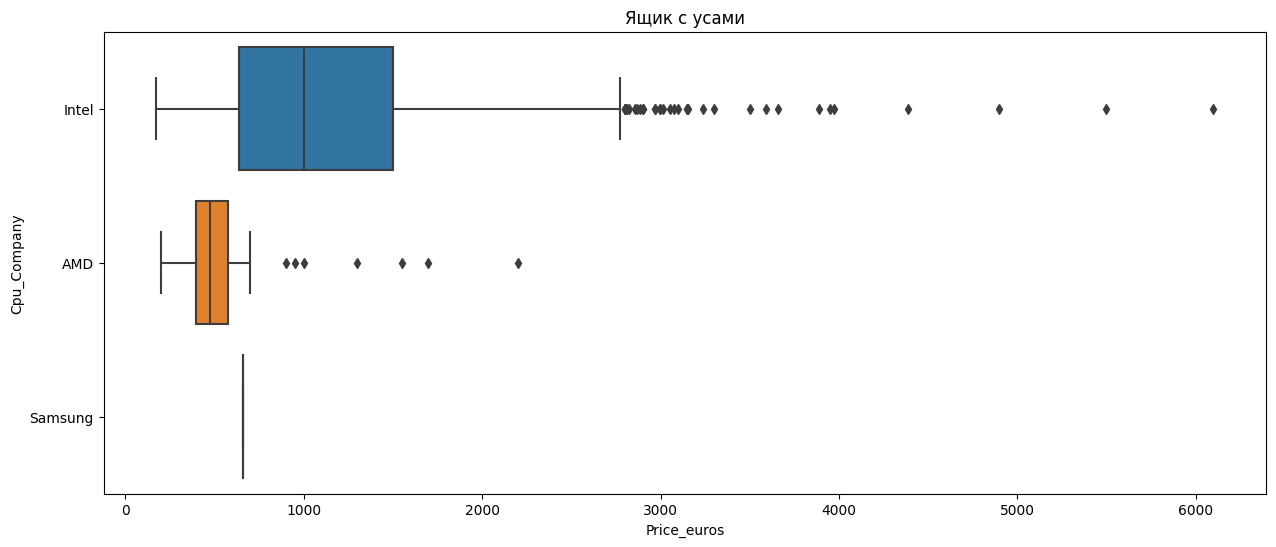

In [52]:
plt.figure(figsize=[15,6])
sbs.boxplot(y=df.Cpu_Company, x=df.Price_euros)
plt.title("Ящик с усами")

In [54]:
df[df.Price_euros > 4000]

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
196,Razer,Blade Pro,Gaming,17.3,Intel Core i7 7820HK 2.9GHz,32GB,Nvidia GeForce GTX 1080,Windows 10,3.49,6099.0,Intel,1024,SSD
610,Lenovo,Thinkpad P51,Notebook,15.6,Intel Xeon E3-1535M v6 3.1GHz,32GB,Nvidia Quadro M2200M,Windows 10,2.50,4899.0,Intel,1024,SSD
749,HP,Zbook 17,Workstation,17.3,Intel Xeon E3-1535M v5 2.9GHz,16GB,Nvidia Quadro M2000M,Windows 7,3.00,4389.0,Intel,256,SSD
830,Razer,Blade Pro,Gaming,17.3,Intel Core i7 7820HK 2.9GHz,32GB,Nvidia GeForce GTX 1080,Windows 10,3.49,5499.0,Intel,512,SSD


### 4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти

Text(0.5, 1.0, 'Violinplot')

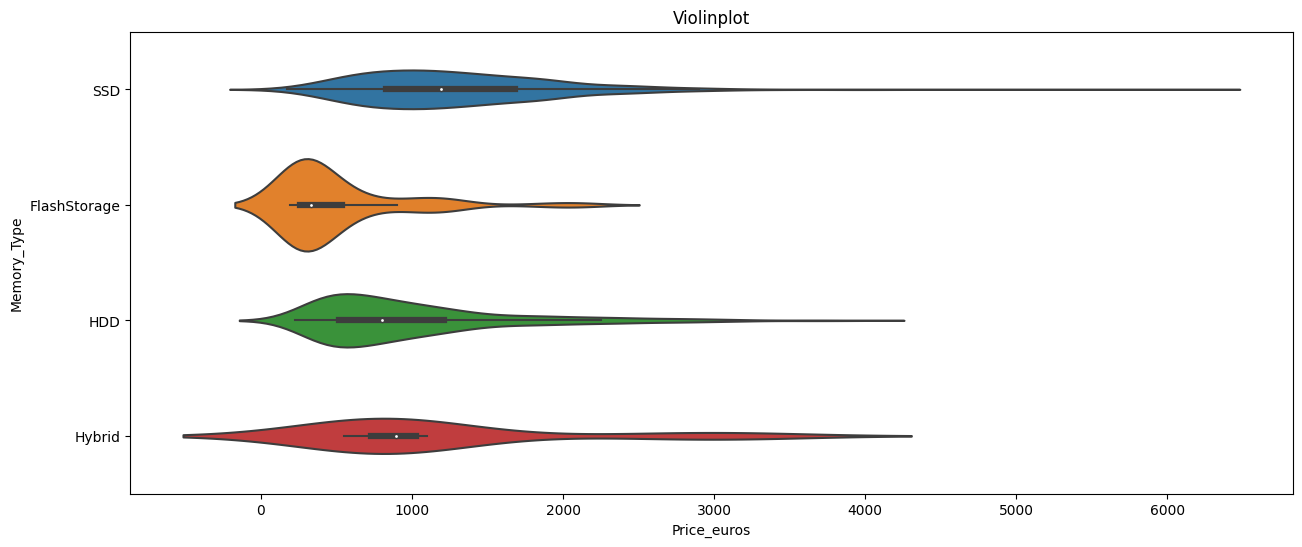

In [56]:
plt.figure(figsize=[15,6])
sbs.violinplot(y=df.Memory_Type, x=df.Price_euros,whis=1.5)
plt.title("Violinplot")

### 4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти

In [57]:
df.sample()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
251,Asus,ROG G752VSK-GC493T,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,16GB,Nvidia GeForce GTX 980M,Windows 10,4.3,1799.0,Intel,256,HDD


Text(0.5, 1.0, 'Связь производитель - стоимость')

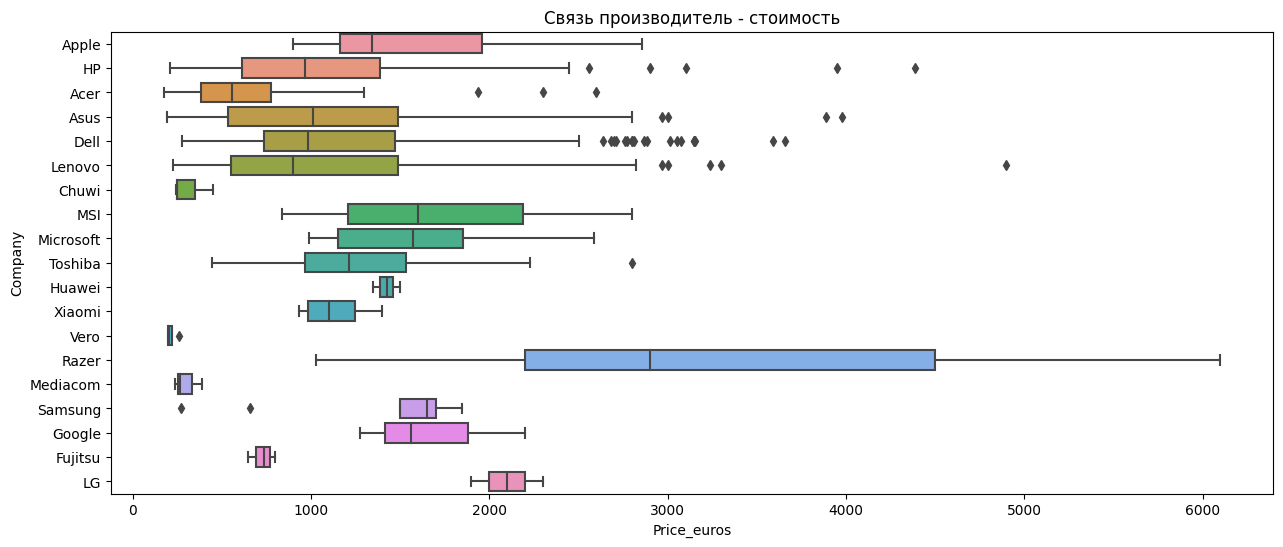

In [64]:
plt.figure(figsize=[15,6])
sbs.boxplot(y=df.Company, x=df.Price_euros)
plt.title("Связь производитель - стоимость")

In [66]:
#показать выбросы для анализа
df[
    (df.Company.isin(['HP', 'Acer','Asus','Dell','Lenovo']))
 & (df.Price_euros > 3000)
 ].sort_values('Price_euros', ascending=False)

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
610,Lenovo,Thinkpad P51,Notebook,15.6,Intel Xeon E3-1535M v6 3.1GHz,32GB,Nvidia Quadro M2200M,Windows 10,2.50,4899.00,Intel,1024,SSD
749,HP,Zbook 17,Workstation,17.3,Intel Xeon E3-1535M v5 2.9GHz,16GB,Nvidia Quadro M2000M,Windows 7,3.00,4389.00,Intel,256,SSD
1066,Asus,ROG G701VO,Gaming,17.3,Intel Core i7 6820HK 2.7GHz,64GB,Nvidia GeForce GTX 980,Windows 10,3.58,3975.00,Intel,1024,SSD
1136,HP,ZBook 17,Workstation,17.3,Intel Core i7 6700HQ 2.6GHz,8GB,Nvidia Quadro M3000M,Windows 7,3.00,3949.40,Intel,256,SSD
238,Asus,ROG G703VI-E5062T,Gaming,17.3,Intel Core i7 7820HK 2.9GHz,32GB,Nvidia GeForce GTX 1080,Windows 10,4.70,3890.00,Intel,512,HDD
723,Dell,Alienware 17,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,32GB,Nvidia GeForce GTX 1070,Windows 10,4.36,3659.40,Intel,1024,HDD
780,Dell,Alienware 17,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,32GB,Nvidia GeForce GTX 1070M,Windows 10,4.42,3588.80,Intel,1024,HDD
744,Lenovo,Thinkpad P51s,Workstation,15.6,Intel Core i7 7600U 2.8GHz,16GB,Nvidia Quadro M520M,Windows 10,2.50,3299.00,Intel,1024,SSD
1081,Lenovo,IdeaPad Y900-17ISK,Gaming,17.3,Intel Core i7 6820HK 2.7GHz,32GB,Nvidia GeForce GTX 980M,Windows 10,4.60,3240.00,Intel,512,Hybrid
955,Dell,Alienware 17,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,16GB,Nvidia GeForce GTX 1070,Windows 10,4.36,3154.00,Intel,512,HDD


## Задание 5
Постройте матрицу корреляций для таблицы
до 0.2(очень слабая), 0.5(слабая), 0.7(средняя),0.9(высокая), свыше(очень высокая)

In [67]:
corr_matrix = df.corr()
corr_matrix

C:\Users\User\AppData\Local\Temp\ipykernel_22388\2355143037.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,Inches,Weight,Price_euros,Memory_Amount
Inches,1.000000,0.827631,0.068197,0.269718
Weight,0.827631,1.000000,0.210370,0.180557
Price_euros,0.068197,0.210370,1.000000,-0.125363
Memory_Amount,0.269718,0.180557,-0.125363,1.000000


In [ ]:
corr_matrix = np.round(corr_matrix, 1)
corr_matrix